### 2491 - Data Visualization - Prof. Iolanda Velho
Giorgio Chachanidze (44944) | Thomas Dornigg (41727)

In [5]:
# @hidden
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.style as style
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from functools import reduce
from itertools import cycle, islice
%matplotlib inline
from IPython.display import Image
from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", module = "matplotlib\..*" )
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)

In [14]:
# @hidden
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 }else {
 $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To display the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Data Visualization (course project): U.S. Police Shootings

<p align="center">
    <img width="900" height="350" src = "https://miro.medium.com/max/1936/0*uQOgFqi7gZkaSkX9">
 </p>

Since the killing of George Floyd by Minneapolis Police Officers last year in May, tens of thousands of people around the world have been protesting against soaring police violence. In the wake of the protests, many people in the U.S. and around the globe started to sympathize with the in 2013 founded Black Lives Matter movement. The protests precipitated a worldwide debate on racial injustice that has led to numerous legislative proposals on federal, state, and municipal levels intended to combat police misconduct, systemic racism, qualified immunity and police brutality. However, since the start of the protests, police violence did not stop. In fact, the United States of America has one of the highest number of police shootings in the entire world.

The dataset "US Police Shootings" for this project can be found on <a href="https://www.kaggle.com/ahsen1330/us-police-shootings">Kaggle</a>. It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event and where it happened, how the victims were shot, did the victims attack, were they holding weapons when they were shot, did the victims show any mental illness, was the policeman wearing a camera/was the incident recorded, and did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect.

The main goal of this course-project is to make use of data visualization techniques to analyze policeshootings in the United States during a time-horizon of Jan. 2015 till June 2020. By doing so, following main research question will be addressed:

<code>**Is there a trend observable towards racial discrimination by U.S. police forces and if so, what‘s the sign of it?**</code>

With the help of this dataset, we want to conclude if race specifically can be a prominent determinant over the actual behaviours of the individuals. By trying to answer the main research-question, we will also address following sub-questions:

\begin{itemize}
\item \textbf{Q.1:} Is the general perception of media coverage correct that more black people are victims of shootings than others, such as Hispanics or Asians?
\item \textbf{Q.2:} Are there specific geographical areas like cities or states were excessive amount of shootings take place? If so, who is most often affected?
\item \textbf{Q.3:} Between the different race-demographics, how does the age differ among the victims?
\end{itemize}

In [6]:
# @hidden
df = pd.read_csv('shootings.csv', low_memory = True)
df['date'] =  pd.to_datetime(df['date'])

# create year variable
df['year'] = df['date'].astype(str).str[:4].astype(int)
# create month variable
df['month'] = df['date'].astype(str).str[5:7].astype(int)

***Dataset***<br>
The dataset for this project was downloaded from Kaggle and uploaded to the author's Github account which allows for a flexible data import. Before doing the analysis via visualizations, we checked for missing values. However, fortunately, we don't have to do any transformations or wrangling of the data set since no missing values were detected. Thus, we were able to move directly to the feature engineering and visualization part.

In [13]:
# @hidden
display(HTML(df.head(5).to_html()))

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1


As one can see from the first few rows, the dataset includes the following variables:
- id: unique identifier per case
- name: name of shot person
- date: date of incident
- manner_of_death: how was the person killed?
- armed: Was the person killed armed? If so, what was the weapon
- age
- gender
- race
- city
- state
- signs_of_mental_illness: Were there apparent signs that a person was mentally ill (True/False)?
- threat_level: Were police officers attacked by the suspects?
- flee: Was there an attempt fleeing
- body_camera
- arms_category

Also, the group decided to add two more features to the dataset, namely:
- year
- month

## Do police officers shoot people because of racial differences?

### Kilings across time in the U.S. 

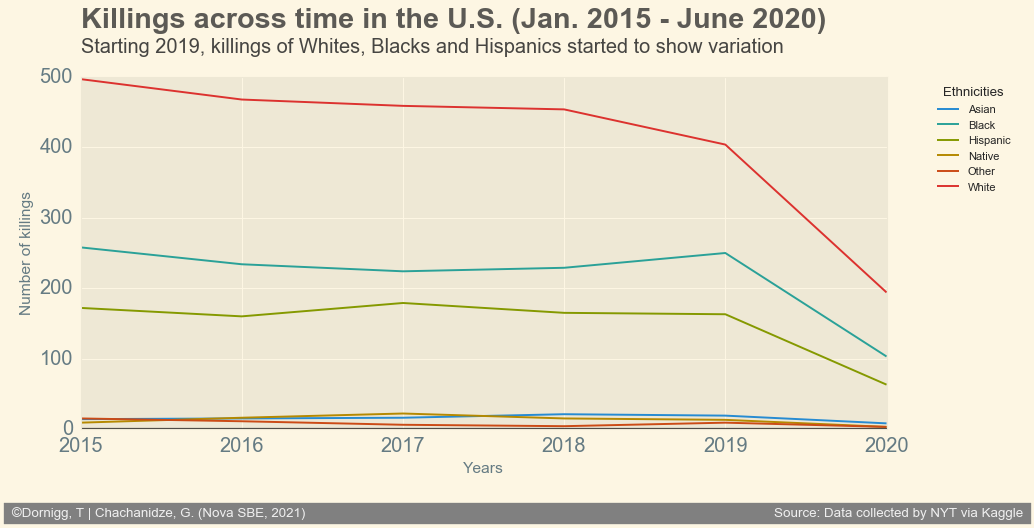

In [428]:
# @hidden
style.use('seaborn-notebook')
#plt.figure(figsize=(15, 6))
df_race_time = df[['year', 'race']]
df_race_time = df_race_time.groupby(['race', 'year']).size().reset_index()
df_race_time.columns = ['race', 'Year', 'amount']
trial = df_race_time.groupby(['Year', 'race'])['amount'].sum().reset_index()
trial = trial.pivot(index="Year", columns="race").dropna(axis = 1, how="any").reset_index()
fte_graph = trial.plot(x = 'Year', y = 'amount', figsize=(13,5.5))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Customizing the tick labels of the y-axis
fte_graph.set_xticklabels(labels = [2015,  2016, 2017, 2018, 2019, 2020]);

# Generate a bolded horizontal line at y = 0
fte_graph.axhline(y = 0, color = 'black', linewidth = 2, alpha = .7)

fte_graph.set_xlim(left = 2015, right = 2020)

#Remove the label of the x-axis
fte_graph.xaxis.label.set_visible(True)
fte_graph.yaxis.label.set_visible(True)

plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of killings", fontsize = 14)

fte_graph.legend(title='Ethnicities', bbox_to_anchor=(1.05, 1), loc='upper left')

# The signature bar
fte_graph.text(x = 2014.55, y = -125, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                             Source: Data collected by NYT via Kaggle ',
fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');

#Title and Subtitle Placement
fte_graph.text(x = 2015, y = 570, s = "Killings across time in the U.S. (Jan. 2015 - June 2020)",
               fontsize = 26, weight = 'bold', alpha = .75);
fte_graph.text(x = 2015, y = 535,
               s = 'Starting 2019, killings of Whites, Blacks and Hispanics started to show variation',
              fontsize = 18, alpha = .85);

### Geographical distribution of shootings across the U.S.

In order to answer the second research question - <code>if there are specific geographical areas like cities or states were excessive amount of shootings take place and who is most often affected</code>, the group looked at first at the national state level to figure out, which states have the highest amount of shootings. From there, it is possible to see that Califorina, Texas and Florida shine out the most. To answer the second part of the question, the group looked at each of the states individually.

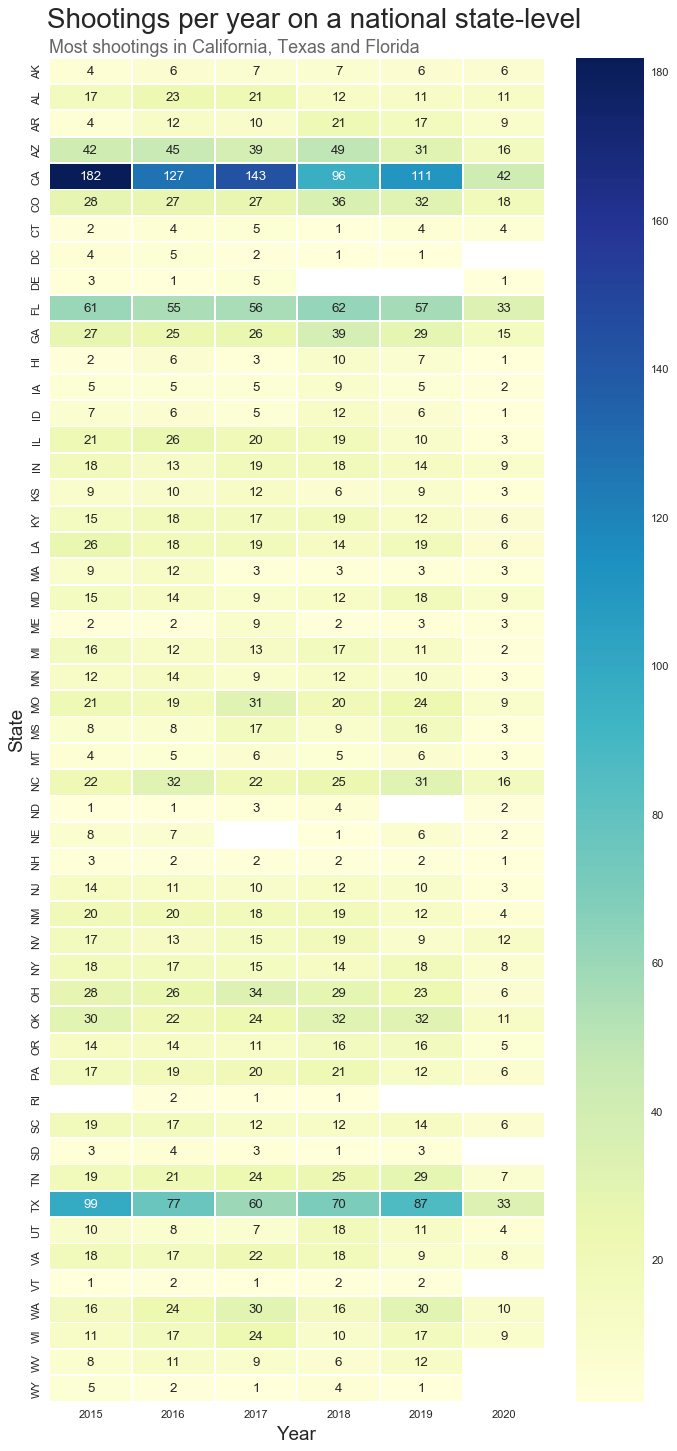

In [442]:
# @hidden
# https://www.kaggle.com/paramarthasengupta/eda-shooting-deaths-in-the-united-states
sns.set_style("ticks")
sns.set_palette("RdBu")
df_year_state = df.groupby(['year','state']).apply(lambda x: x['manner_of_death'].count()).reset_index(name='Counts')
df_pivot = pd.pivot(df_year_state, columns='year', index='state', values='Counts')
df_pivot.replace(np.NaN, 0)
plt.figure(figsize=(10, 21))
fig = sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True, linewidths=.7)
plt.xlabel('Year', size=17)
plt.ylabel('State', size=17)
#plt.title('Shootings per year on state-level', size=25, loc='left')
plt.title('Most shootings in California, Texas and Florida',fontsize=16, loc = 'left', alpha = 0.70, y=1.07)
plt.suptitle('Shootings per year on a national state-level',fontsize=25, y=0.93, x=0.4555)
plt.show();

As shown in the heatmap above, the US is too big to generalize. There are huge discrepancies between states, with most incidence on the East and West coast, the South, and fewer incidents in the Midwest. These results, however, are in conformity with their population, meaning the more populated on average states are, the more killings are observed.

Given the difference in killings by various states, we will focus ourselves on the ten most affected states and thus cities.

### Breakdown of shooting-incidents by the top 10 cities

In [397]:
# https://www.kaggle.com/paramarthasengupta/eda-shooting-deaths-in-the-united-states

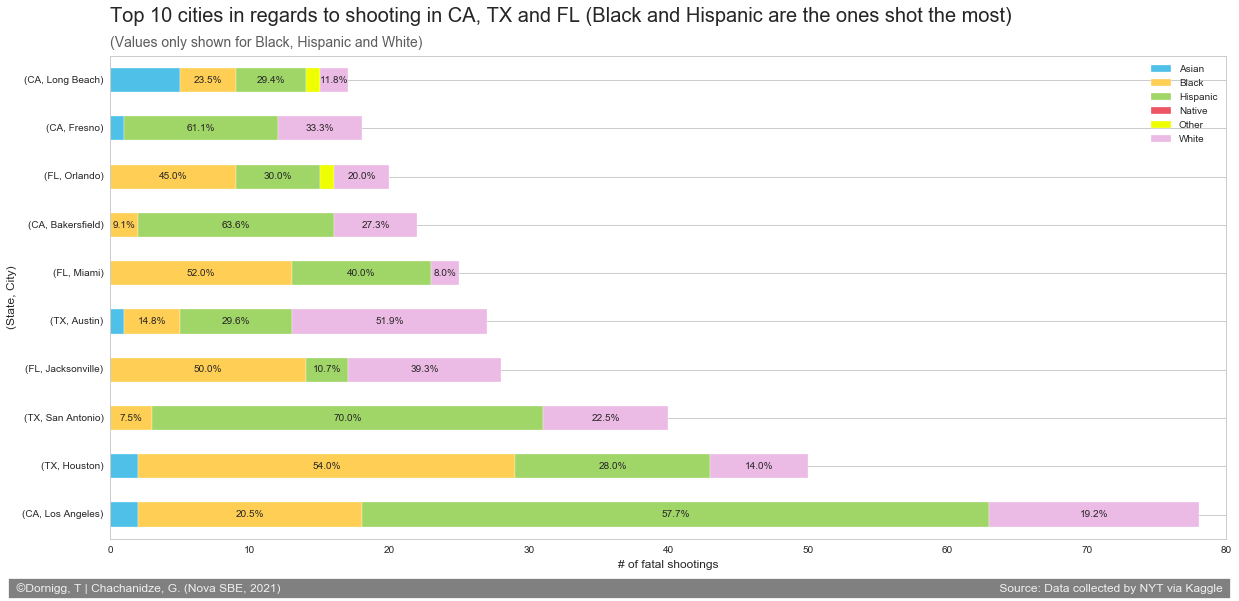

In [456]:
# @hidden
plt.style.use('seaborn-whitegrid')
filter_list = ['TX', 'CA', 'FL']
df = df[df.state.isin(filter_list)]
df_states = pd.pivot_table(df, values='id', index=['state','city'], columns=['race'], aggfunc='count')
df_states['Total'] = df_states.sum(skipna=None, axis = 1)
df_states = df_states.sort_values(by='Total', ascending =False).head(10)

#Graph1 - city
fig, ax = plt.subplots(figsize=(20, 14*0.6180))
data = df_states.drop(['Total'], axis=1)

my_colors = list(islice(cycle(["#4FC1E8", "#FFCE54", "#A0D568", "#ED5564", "#EFFE00", '#ECBBE5']), None, len(data)))
g = data.plot(kind="barh",stacked=True, ax = ax, color=my_colors) 

g.xaxis.grid(True)
g.yaxis.grid(False)
plt.ylabel("(State, City)");
plt.xlabel("# of fatal shootings");


#plt.suptitle("In the 10 cities with most shootings, Black and Hispanic are the ones shot the most", fontsize=16, weight='bold');
#plt.text(x=20, y=10, s='Values only shown for Black, Hispanic and White', fontsize=14, alpha=0.75)

plt.title('Top 10 cities in regards to shooting in CA, TX and FL (Black and Hispanic are the ones shot the most)',fontsize=20, loc = 'left', alpha = 1, y=1.06)
plt.text(x=0, y=9.7, s='(Values only shown for Black, Hispanic and White)', fontsize=14, alpha=0.75)

df_rel = data.div(df_states['Total'], 0)*100
df_rel = df_rel.fillna(0).astype("float")

for n in df_rel[['Black','Hispanic','White']]: 
    for i, (cs, ab, pc) in enumerate(zip(data.loc[:, :].cumsum(1)[n], data[n], df_rel[n])):
        if math.isnan(cs-ab/2):
            pass
        else:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center', fontsize = 10)
            
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.text(x = -7, y = -1.6, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                                                                                                                     Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

The vast majority of casaulties were armed with guns(shotguns, handguns etc.), followed by people with sharp tools(knives, axes etc.). However, there is also a group of unarmed victims which can give you the idea that the police were too aggressive. I would like also to check if age had something to do with the choice of weapon. For this, I used violin chart. Interestingly enough, explosives were used exclusively by middle-aged people (between 35 and 50 y.o.). What is worrying is the fact that guns are used even by very young people(below 20 y.o.). Now let's look at the psychological aspect of victims.

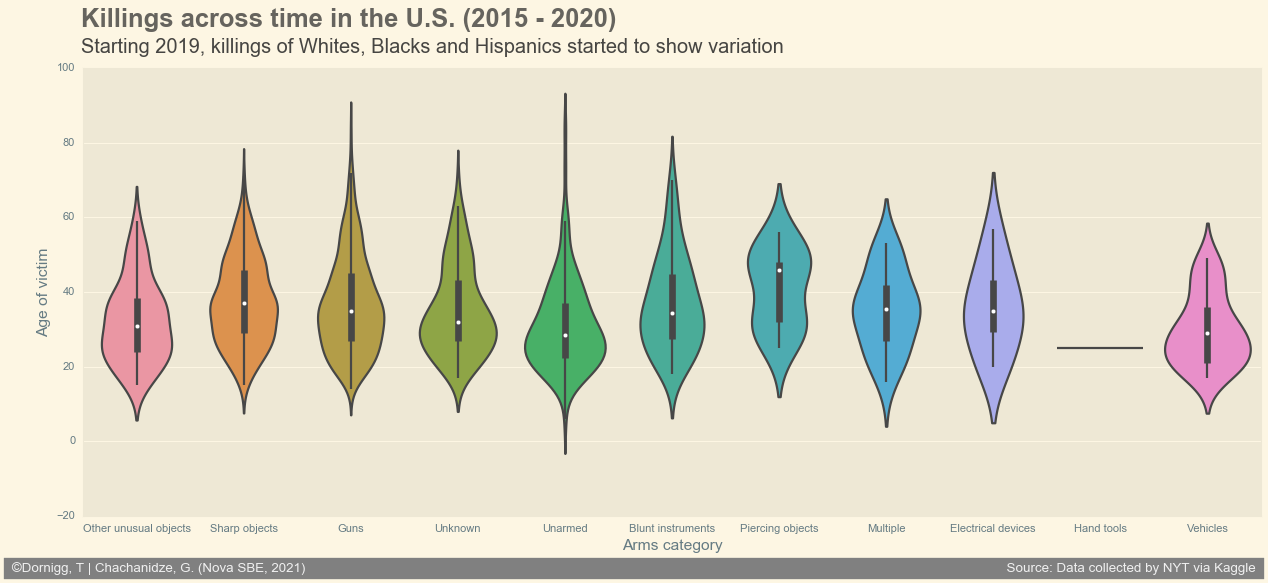

In [449]:
# @hidden
plt.style.use('Solarize_Light2')
plt.figure(figsize=(19, 7))
fte_graph = sns.violinplot(x='arms_category', y='age', data=df)

#Remove the label of the x-axis
fte_graph.xaxis.label.set_visible(True)
fte_graph.yaxis.label.set_visible(True)

plt.xlabel("Arms category", fontsize = 14)
plt.ylabel("Age of victim", fontsize = 14)

# The signature bar
fte_graph.text(x = -1.2, y = -35, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                                                                                           Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');

##Title and Subtitle Placement
fte_graph.text(x = -0.52, y = 111, s = "Killings across time in the U.S. (2015 - 2020)", fontsize = 23, weight = 'bold', alpha = .70);
fte_graph.text(x = -0.52, y = 104, s = 'Starting 2019, killings of Whites, Blacks and Hispanics started to show variation', fontsize = 18, alpha = .85)
plt.show();

Gender was another demographic feature. We check the percentage of camera shots for both men and women. The difference is practically non-existent - we observe an equal share of shots with the camera turned on in both women and men, which is close to the average in the population of about 12%. Gender is certainly not a feature to differentiate whether the incident was filmed.

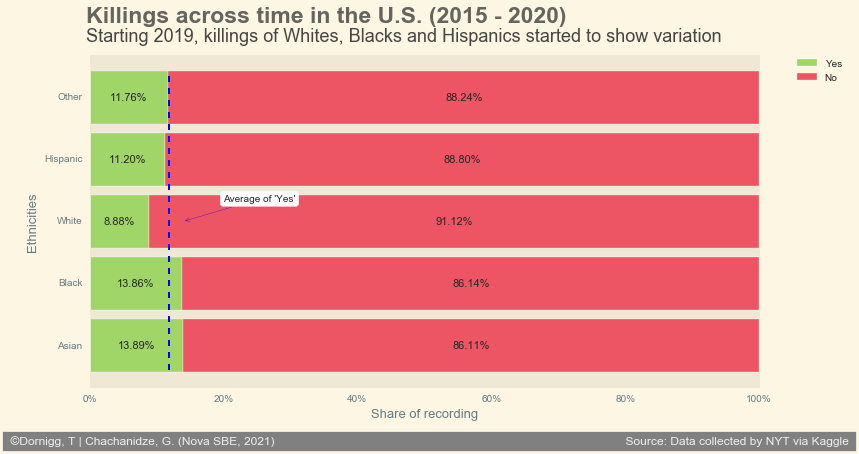

In [469]:
# @hidden
# https://www.kaggle.com/michau96/shot-with-camera-on-or-off
b = df.groupby(['body_camera', 'race']).size().reset_index()
b.columns = ['body_camera', 'race', 'amount']

asian = b[b['race'] == 'Asian']['amount'].to_list()
black = b[b['race'] == 'Black']['amount'].to_list()
white = b[b['race'] == 'White']['amount'].to_list()
hispanics = b[b['race'] == 'Hispanic']['amount'].to_list()
other = b[b['race'] == 'Other']['amount'].to_list()

asian_norm = [i/sum(b[b['race'] == 'Asian']['amount'].to_list()) for i in asian]
black_norm = [i/sum(b[b['race'] == 'Black']['amount'].to_list()) for i in black]
white_norm = [i/sum(b[b['race'] == 'White']['amount'].to_list()) for i in white]
hispanics_norm = [i/sum(b[b['race'] == 'Hispanic']['amount'].to_list()) for i in hispanics]
other_norm = [i/sum(b[b['race'] == 'Other']['amount'].to_list()) for i in other]

race_list = ['Asian', 'Black', 'White', 'Hispanic', 'Other']
data_combined = pd.DataFrame(list(zip(asian_norm, black_norm, white_norm, hispanics_norm, other_norm))).T
data_combined.columns = ['No', 'Yes']
data_combined = data_combined[['Yes', 'No']]
data_combined['Race'] = race_list
data_combined = data_combined.set_index('Race')
data_combined = data_combined * 100
average = data_combined['Yes'].mean()

plt.style.use('Solarize_Light2')

ax = data_combined.plot.barh(stacked=True, figsize=(12, 5.95), color={"Yes": "#A0D568", "No": "#ED5564"}, bottom=None, width=0.85)

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.2f}%'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.text(x = -12.3, y = -1.6, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                        Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');
##Title and Subtitle Placement
ax.text(x = -0.55, y = 5.2, s = "Killings across time in the U.S. (2015 - 2020)", fontsize = 23, weight = 'bold', alpha = .70);
ax.text(x = -0.55, y = 4.9, s = 'Starting 2019, killings of Whites, Blacks and Hispanics started to show variation', fontsize = 18, alpha = .85)

# only one line may be specified; ymin & ymax spedified as a percentage of y-range
plt.axvline(x=average, ymin=0.051, ymax=0.9547069, color='blue', ls='--', lw=2)

annot = ax.annotate("Average of 'Yes'", xy=(14,2), xytext=(40,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->", color = 'blue'))
annot.set_visible(True)


# add labels
ax.set_ylabel("Ethnicities", fontsize=13)
ax.set_xlabel("Share of recording", fontsize=13)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
plt.grid(False)
plt.show();

In [1]:
sns.catplot('race', kind='count', data=df,hue='threat_level',palette='viridis',height=8,aspect=2)
plt.xticks(size=15)
plt.xlabel('Race',size=20)
plt.yticks(size=15)
plt.ylabel('Count',size=20)
plt.title('Threat level of each of the races',size=25)
plt.legend(fontsize=15)

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

In [ ]:
# https://www.kaggle.com/michau96/shot-with-camera-on-or-off